In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,Unnamed: 0,brand,km_driven,fuel,owner,selling_price
0,0,Maruti,145500,Diesel,First Owner,450000
1,1,Skoda,120000,Diesel,Second Owner,370000
2,2,Honda,140000,Petrol,Third Owner,158000
3,3,Hyundai,127000,Diesel,First Owner,225000
4,4,Maruti,120000,Petrol,First Owner,130000


In [4]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [5]:
df['brand'].nunique()

32

In [6]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [7]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

# 1.OneHotEncoding using Pandas

In [8]:
df.head()

,Unnamed: 0,brand,km_driven,fuel,owner,selling_price
0,0,Maruti,145500,Diesel,First Owner,450000
1,1,Skoda,120000,Diesel,Second Owner,370000
2,2,Honda,140000,Petrol,Third Owner,158000
3,3,Hyundai,127000,Diesel,First Owner,225000
4,4,Maruti,120000,Petrol,First Owner,130000


In [9]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# Now df does not contain the 'Unnamed: 0' column
print(df)

        brand  km_driven    fuel                 owner  selling_price
0      Maruti     145500  Diesel           First Owner         450000
1       Skoda     120000  Diesel          Second Owner         370000
2       Honda     140000  Petrol           Third Owner         158000
3     Hyundai     127000  Diesel           First Owner         225000
4      Maruti     120000  Petrol           First Owner         130000
...       ...        ...     ...                   ...            ...
8123  Hyundai     110000  Petrol           First Owner         320000
8124  Hyundai     119000  Diesel  Fourth & Above Owner         135000
8125   Maruti     120000  Diesel           First Owner         382000
8126     Tata      25000  Diesel           First Owner         290000
8127     Tata      25000  Diesel           First Owner         290000

[8128 rows x 5 columns]


In [17]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [19]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


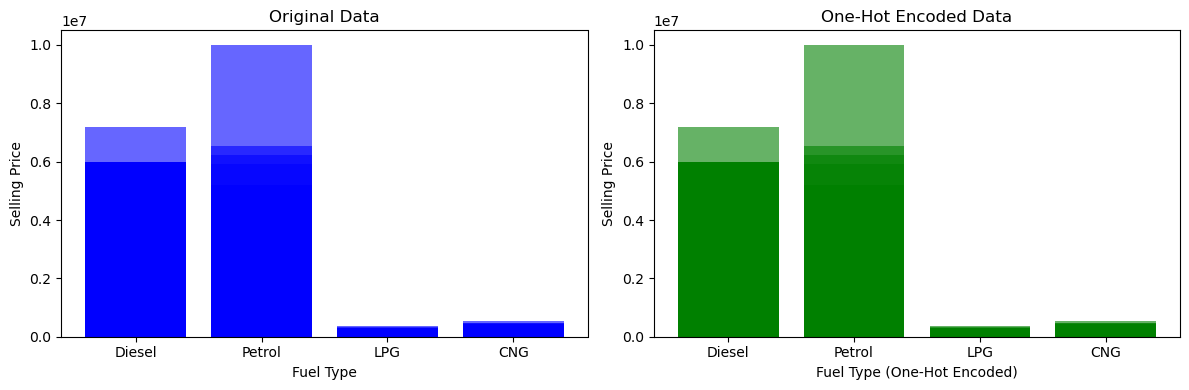

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Original data
axs[0].bar(df['fuel'], df['selling_price'], color='blue', alpha=0.6, label='Original Data')
axs[0].set_xlabel('Fuel Type')
axs[0].set_ylabel('Selling Price')
axs[0].set_title('Original Data')

# One-Hot Encoded Data
one_hot_df = pd.get_dummies(df, columns=['fuel'])
# Select one-hot encoded columns for fuel
fuel_columns = [col for col in one_hot_df.columns if col.startswith('fuel_')]
axs[1].bar(df['fuel'], one_hot_df['selling_price'], color='green', alpha=0.6, label='One-Hot Encoded Data')
axs[1].set_xlabel('Fuel Type (One-Hot Encoded)')
axs[1].set_ylabel('Selling Price')
axs[1].set_title('One-Hot Encoded Data')

plt.tight_layout()
plt.show()


# K-1 OneHotEncoding

In [28]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


# 3.OneHotEncoding using Sklearn

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)


In [28]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [38]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [32]:
X_train_new.shape

(6502, 7)

In [37]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [35]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [40]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

# 4. OneHotEncoding with Top Categories

In [41]:
counts = df['brand'].value_counts()
print(counts)

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64


In [43]:
counts[counts <= threshold].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [46]:
df['brand'].nunique()
threshold = 100

In [47]:
repl = counts[counts <= threshold].index

In [48]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False


In [49]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
2691,False,False,False,False,False,False,True,False,False,False,False,False,False
1778,False,False,False,False,False,False,True,False,False,False,False,False,False
1809,False,False,False,False,False,False,False,False,False,True,False,False,False
7586,False,False,False,False,False,False,True,False,False,False,False,False,False
4633,False,False,False,False,False,False,True,False,False,False,False,False,False
